In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!unzip /content/drive/MyDrive/Rice.zip

Archive:  /content/drive/MyDrive/Rice.zip
replace Rot_Img/test/Bacterial leaf blight/Bacterial115.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial115.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial116.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial117.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial118.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial119.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial120.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial24.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial25.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial26.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial27.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial56.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/rice_0_1165.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/rice_0_1172



---



---


**PHẦN 1: TRAIN MODEL**


---



---



**1) Khai báo thư viện**

In [2]:
#Khai bao thu vien
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers.core import Dropout
from imutils import paths
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from google.colab.patches import cv2_imshow
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

**2) Khởi tạo model**

*2.1) DenseNet*

In [5]:
#Model_DenseNet121
from tensorflow.keras.applications import DenseNet121
baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2,2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
______________________________________________________________________________________________

*2.2) VGG16*

In [ ]:
# # Model VGG16
# from tensorflow.keras.applications import VGG16
# baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

*2.3) MobileNet*

In [ ]:
# #Model MobileNet
# from tensorflow.keras.applications import MobileNet
# baseModel = MobileNet(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

*2.4) InceptionV3*

In [ ]:
# #Model Inception
# from tensorflow.keras.applications import InceptionV3
# baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(76, 76, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(1,1))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

**3) Thiết lập LR, Batch_size, Epochs**

In [6]:
#thiet lap thong so lr, batch_size va epochs
INIT_LR = 1e-4
BS = 8
EPOCHS = 20

**4) Khởi tạo ảnh đầu vào**

In [7]:
#khoi tao input
imagePaths = list(paths.list_images('/content/Rot_Img/train'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (64,64))
    # cv2_imshow(image)
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float") / 255.0

**5) Mã hoá one-hot nhãn**

In [8]:
#one-hot label
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels, 3)

**6) Thiết lập dữ liệu train**

In [9]:
#set du lieu train
(X_train, X_val, y_train, y_val) = train_test_split(data, labels, test_size=0.1, random_state=42)

**7) Compile và train model**

In [10]:
#compile + train
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=BS, steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

Epoch 1/20
282/282 [==============================] - 32s 68ms/step - loss: 0.6720 - accuracy: 0.7114 - val_loss: 0.3521 - val_accuracy: 0.8532
Epoch 2/20
282/282 [==============================] - 18s 59ms/step - loss: 0.3653 - accuracy: 0.8676 - val_loss: 0.1531 - val_accuracy: 0.9325
Epoch 3/20
282/282 [==============================] - 16s 57ms/step - loss: 0.3000 - accuracy: 0.8805 - val_loss: 0.1253 - val_accuracy: 0.9643
Epoch 4/20
282/282 [==============================] - 16s 57ms/step - loss: 0.2475 - accuracy: 0.9129 - val_loss: 0.0845 - val_accuracy: 0.9722
Epoch 5/20
282/282 [==============================] - 17s 60ms/step - loss: 0.1791 - accuracy: 0.9387 - val_loss: 0.1091 - val_accuracy: 0.9643
Epoch 6/20
282/282 [==============================] - 17s 59ms/step - loss: 0.1287 - accuracy: 0.9560 - val_loss: 0.0560 - val_accuracy: 0.9762
Epoch 7/20
282/282 [==============================] - 17s 59ms/step - loss: 0.1672 - accuracy: 0.9418 - val_loss: 0.0687 - val_accuracy:

**8) Đồ thị**

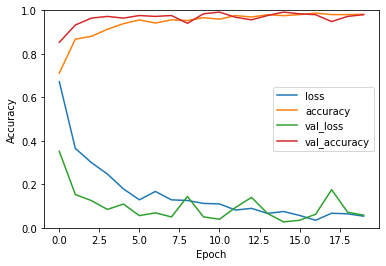

In [11]:
#do thi
import matplotlib.pyplot as plt

plt.plot(np.arange(0, EPOCHS), H.history['loss'], label='loss')
plt.plot(np.arange(0, EPOCHS), H.history['accuracy'], label = 'accuracy')
plt.plot(np.arange(0, EPOCHS), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, EPOCHS), H.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.show()

**9) Lưu model**

In [12]:
#save model
model.save('XLA_ModelDenseNet121.h5')

**HẾT PHẦN 1**

---



---



***Load model đã train trước đó***

In [13]:
from keras.models import load_model

model1 = load_model('/content/drive/MyDrive/ImgProc/XLA_DenseNet121.h5')



---



---

**PHẦN 2: TEST VỚI DỮ LIỆU TRONG DATASET BAN ĐẦU**


---



---



**1) Khai báo thư viện**

In [14]:
#Khai bao thu vien
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers.core import Dropout
from imutils import paths
from google.colab.patches import cv2_imshow
from keras.models import load_model
import numpy as np
import pickle
import cv2
import os

**2) Khởi tạo dữ liệu test + One-hot nhãn**

In [15]:
#Khoi tao du lieu test
imagePaths_test = list(paths.list_images('/content/Rot_Img/test'))
data_test = []
labels_test = []
for path_test in imagePaths_test:
    label2 = path_test.split(os.path.sep)[-2]
    image2 = cv2.imread(path_test)
    image2 = cv2.resize(image2, (64,64))
    data_test.append(image2)
    labels_test.append(label2)
data_test = np.array(data_test, dtype="float") / 255.0

#one-hot label
le_test = LabelEncoder()
labels_test = le_test.fit_transform(labels_test)
labels_test = np_utils.to_categorical(labels_test, 3)

**3) Thiết lập dữ liệu test**

In [16]:
#set du lieu test
X_test = data_test
y_test = labels_test

**4) Đánh giá tệp test**

In [17]:
score_test = model1.evaluate(X_test, y_test)
print('Score test = ', score_test)

9/9 [==============================] - 25s 106ms/step - loss: 0.0928 - accuracy: 0.9667
Score test =  [0.09281094372272491, 0.9666666388511658]


**6) Bảng thống kê các giá trị phân loại**


> Accuracy = (TP+TN)/(TP+FP+FN+TN)

> Precision = TP/(TP+FP)

> Recall = TP/(TP+FN)

> F1 Score = 2(Recall * Precision) / (Recall + Precision)

















In [18]:
y_pred_test = model1.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), y_pred_test.argmax(axis=1), target_names=le_test.classes_, digits = 5))

                       precision    recall  f1-score   support

Bacterial leaf blight    1.00000   0.97778   0.98876        90
           Brown spot    0.98824   0.93333   0.96000        90
            Leaf smut    0.91753   0.98889   0.95187        90

             accuracy                        0.96667       270
            macro avg    0.96859   0.96667   0.96688       270
         weighted avg    0.96859   0.96667   0.96688       270



In [19]:
print("So sanh test")
testY = np.argmax(y_test, axis=1).ravel()
predtestY = np.argmax(y_pred_test, axis=1).ravel()
# print(np.argmax(y_test, axis = 1))
print(testY)
print(predtestY)

So sanh test
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [20]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(testY, predtestY)
print(cnf_matrix)

[[88  0  2]
 [ 0 84  6]
 [ 0  1 89]]


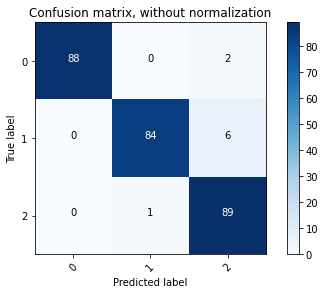

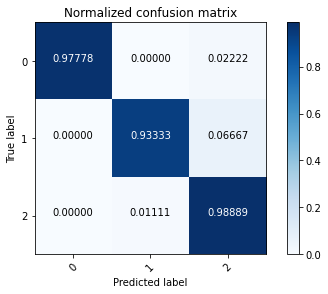

In [21]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

**HẾT PHẦN 2**


---



---





---



---


**PHẦN 3: TEST DỮ LIỆU VỚI MỘT SỐ ẢNH LẤY TỪ BÊN NGOÀI DATASET**


---



---



**1) Kiểm tra với các hình ảnh bên ngoài tập dataset ban đầu**

In [27]:
def define_label(x):
  if x == 0:
    return print('Bacterial Leaf Blight')
  if x == 1:
    return print('Brown spot')
  if x == 2:
    return print('Leaf smut')

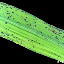

[[8.805940e-15 7.912553e-12 1.000000e+00]]
2
Leaf smut
None


In [31]:
img = cv2.imread('/content/drive/MyDrive/ImgProc/ls4.png')
img = cv2.resize(img,(64,64))
cv2_imshow(img)
img = img.reshape(1,64,64,3)
data_leaf = np.array(img, dtype = 'float') /255.0
one = model1.predict(data_leaf)
print(one)
x = np.argmax(one)
print(x)
print(define_label(x))

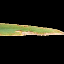

[[9.4718838e-01 3.4466584e-07 5.2811246e-02]]
0
Bacterial Leaf Blight
None


In [33]:
img1 = cv2.imread('/content/drive/MyDrive/ImgProc/Ba1.jpg')
img1 = cv2.resize(img1,(64,64))
cv2_imshow(img1)
img1 = img1.reshape(1,64,64,3)
data_leaf1 = np.array(img1, dtype = 'float') /255.0
one1 = model1.predict(data_leaf1)
print(one1)
x1 = np.argmax(one1)
print(x1)
print(define_label(x1))

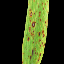

[[0.00114497 0.6015395  0.39731556]]
1
Brown spot
None


In [35]:
img2 = cv2.imread('/content/drive/MyDrive/ImgProc/br5.png')
img2 = cv2.resize(img2,(64,64))
cv2_imshow(img2)
img2 = img2.reshape(1,64,64,3)
data_leaf2 = np.array(img2, dtype = 'float') /255.0
one2 = model1.predict(data_leaf2)
print(one2)
x2 = np.argmax(one2)
print(x2)
print(define_label(x2))